In [1]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices_attrs

In [8]:
fname = "2021_1_28.hdf"
dset_names = [
    "1611871966 check noise",
    "1611872313 check noise with aom stabilization",
    "1611872481 check noise with aom stabilization 50 dB pd gain",
    "1611872576 check noise with aom stabilization 60 dB pd gain again",
#     "1611872974 check noise with aom stabilization 60 dB pd gain again" # already started frequency scan here
]
devices = {}

700 samples
500 samples
500 samples
500 samples


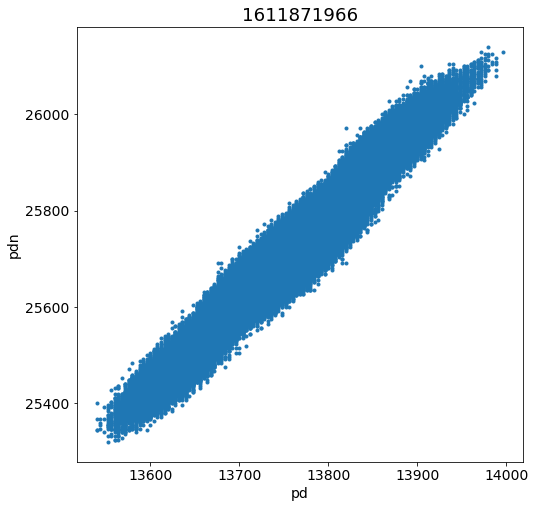

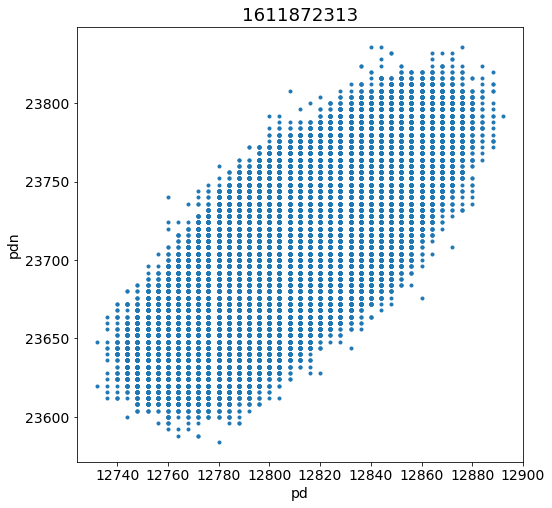

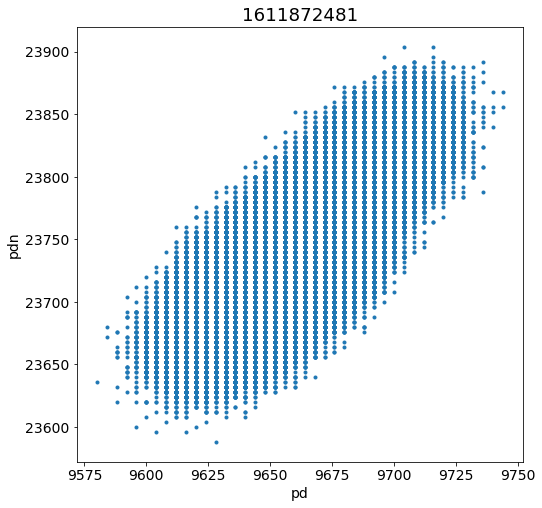

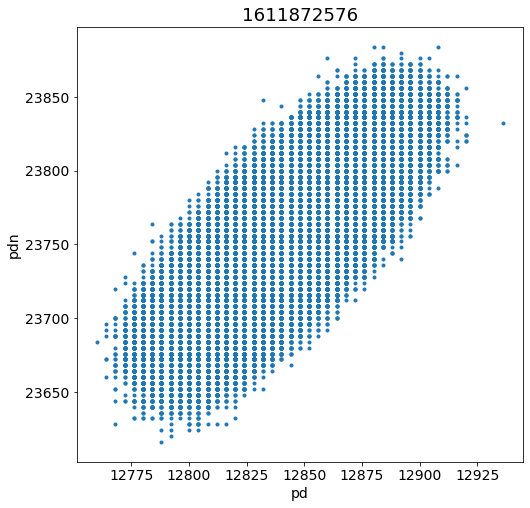

In [9]:
for dset_name in dset_names:
    pmt_channel = 1
    pd_channel = 2
    pdn_channel = 3

    pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

    print(f'{len(pxie)} samples')

    n = pxie[1].shape[0]

    t = np.arange(0,n,1)/100

    pmt_data = np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
    pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
    
    fig, ax = plt.subplots(figsize = (8,8))
    ax.set_title(dset_name.split(" ")[0])
    ax.plot(pd_data.reshape(-1), pdn_data.reshape(-1), '.')
    ax.set_xlabel('pd')
    ax.set_ylabel('pdn')
    set_fontsize(ax, 14)